In [183]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

In [184]:
#Load Dataset csv melalui drive dan tampilkan data statistik nya
dataset = pd.read_csv('/content/drive/My Drive/Datasets/titanic_train.csv')
eval_set = pd.read_csv('/content/drive/My Drive/Datasets/titanic_eval.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,627.0,0.387560,0.487582,0.00,0.0000,0.0000,1.0000,1.0000
age,627.0,29.631308,12.511818,0.75,23.0000,28.0000,35.0000,80.0000
n_siblings_spouses,627.0,0.545455,1.151090,0.00,0.0000,0.0000,1.0000,8.0000
parch,627.0,0.379585,0.792999,0.00,0.0000,0.0000,0.0000,5.0000
fare,627.0,34.385399,54.597730,0.00,7.8958,15.0458,31.3875,512.3292


In [185]:
#Fungsi yang digunakan untuk melihat sejumlah informasi seperti jumlah data perkolom dan type data nya
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [186]:
dataset.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [187]:
#Untuk melihat korelasi antar feature nya
corr = dataset.corr()

corr

,survived,age,n_siblings_spouses,parch,fare
survived,1.000000,-0.033145,-0.049938,0.085773,0.252478
age,-0.033145,1.000000,-0.214280,-0.166974,0.119287
n_siblings_spouses,-0.049938,-0.214280,1.000000,0.430824,0.137795
parch,0.085773,-0.166974,0.430824,1.000000,0.204204
fare,0.252478,0.119287,0.137795,0.204204,1.000000


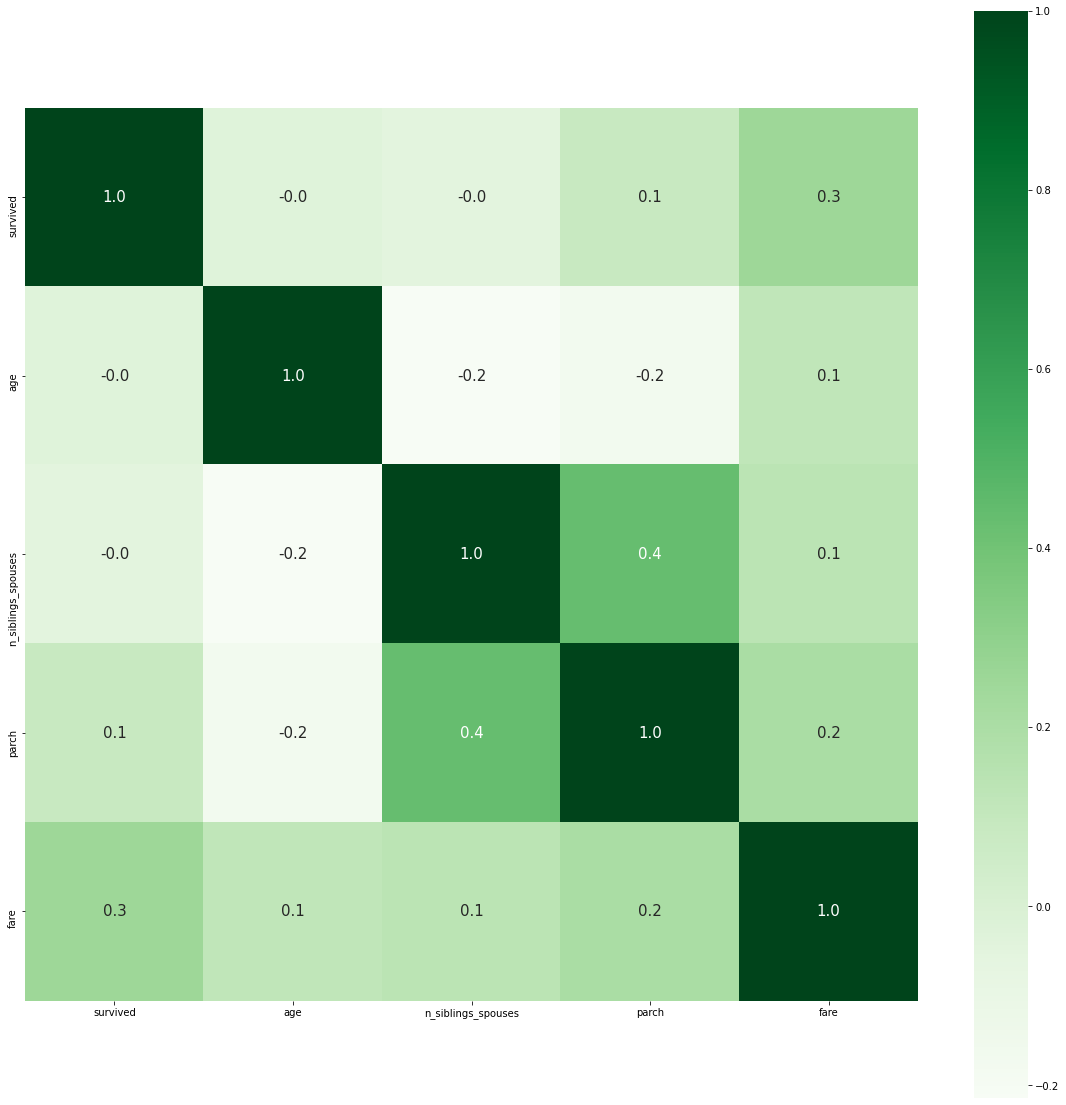

In [188]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Data Cleaning & Feature Engineering

In [189]:
dataset = dataset.drop(['embark_town', 'alone'], axis=1)

In [190]:
dataset.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck
0,0,male,22.0,1,0,7.2500,Third,unknown
1,1,female,38.0,1,0,71.2833,First,C
2,1,female,26.0,0,0,7.9250,Third,unknown
3,1,female,35.0,1,0,53.1000,First,C
4,0,male,28.0,0,0,8.4583,Third,unknown


In [191]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 39.3+ KB


In [192]:
dataset['class'].value_counts()

Third     341
First     159
Second    127
Name: class, dtype: int64

In [193]:
dataset['deck'].value_counts()

unknown    481
C           43
B           37
E           23
D           22
A           11
F            6
G            4
Name: deck, dtype: int64

In [194]:
cleanup_train = {
    'sex':{
        'male' : 1,
        'female' : 0
    },
    'class':{
        'First' : 1,
        'Second' : 2,
        'Third' : 3
    },
    'deck' :{
        'A' : 1,
        'B' : 2,
        'C' : 3,
        'D' : 4,
        'E' : 5,
        'F' : 6,
        'G' : 7,
        'unknown' : 0
    } 
}

dataset.replace(cleanup_train, inplace=True)

In [195]:
dataset.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck
0,0,1,22.0,1,0,7.2500,3,0
1,1,0,38.0,1,0,71.2833,1,3
2,1,0,26.0,0,0,7.9250,3,0
3,1,0,35.0,1,0,53.1000,1,3
4,0,1,28.0,0,0,8.4583,3,0


In [196]:
eval_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            264 non-null    int64  
 1   sex                 264 non-null    object 
 2   age                 264 non-null    float64
 3   n_siblings_spouses  264 non-null    int64  
 4   parch               264 non-null    int64  
 5   fare                264 non-null    float64
 6   class               264 non-null    object 
 7   deck                264 non-null    object 
 8   embark_town         264 non-null    object 
 9   alone               264 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 20.8+ KB


In [197]:
eval_set = eval_set.drop(['embark_town', 'alone'], axis=1)

In [198]:
cleanup_eval = {
    'sex':{
        'male' : 1,
        'female' : 0
    },
    'class':{
        'First' : 1,
        'Second' : 2,
        'Third' : 3
    },
    'deck' :{
        'A' : 1,
        'B' : 2,
        'C' : 3,
        'D' : 4,
        'E' : 5,
        'F' : 6,
        'G' : 7,
        'unknown' : 0
    } 
}

eval_set.replace(cleanup_eval, inplace=True)

In [199]:
eval_set.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck
0,0,1,35.0,0,0,8.0500,3,0
1,0,1,54.0,0,0,51.8625,1,5
2,1,0,58.0,0,0,26.5500,1,3
3,1,0,55.0,0,0,16.0000,2,0
4,1,1,34.0,0,0,13.0000,2,4


In [200]:
eval_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            264 non-null    int64  
 1   sex                 264 non-null    int64  
 2   age                 264 non-null    float64
 3   n_siblings_spouses  264 non-null    int64  
 4   parch               264 non-null    int64  
 5   fare                264 non-null    float64
 6   class               264 non-null    int64  
 7   deck                264 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 16.6 KB


# Preprocessing

In [201]:
label_train = dataset['survived']
feature_train = dataset.drop(['survived'], axis=1)

In [202]:
label_test = eval_set['survived']
feature_test = eval_set.drop(['survived'], axis=1)

In [203]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler() #preprocessing menggunakan standard scaler 

feature_train = scaler.fit_transform(feature_train.values)
feature_test = scaler.fit_transform(feature_test.values)
label_train = scaler.fit_transform(label_train.values.reshape(-1,1)).flatten()
label_test = scaler.fit_transform(label_test.values.reshape(-1,1)).flatten()

# Deep Learning

Pada beberapa model dibawah saya menggunakan Epoch 500 dan batch size 15

In [215]:
model = Sequential() #masih dengan model sequential
model.add(Dense(24, input_dim=7, kernel_initializer='normal', activation='relu')) # 24 neuron, dan input_dim dengan 11 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='SGD') #disini untuk loss nya menggunakan metrics MSE dan optimizer adam

In [216]:
history = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=500, batch_size=15)

Epoch 1/500
42/42 [==============================] - 0s 3ms/step - loss: 0.9924 - val_loss: 0.9700
Epoch 2/500
42/42 [==============================] - 0s 1ms/step - loss: 0.9531 - val_loss: 0.9272
Epoch 3/500
42/42 [==============================] - 0s 1ms/step - loss: 0.8962 - val_loss: 0.8647
Epoch 4/500
42/42 [==============================] - 0s 1ms/step - loss: 0.8169 - val_loss: 0.7877
Epoch 5/500
42/42 [==============================] - 0s 1ms/step - loss: 0.7278 - val_loss: 0.7190
Epoch 6/500
42/42 [==============================] - 0s 2ms/step - loss: 0.6531 - val_loss: 0.6768
Epoch 7/500
42/42 [==============================] - 0s 2ms/step - loss: 0.6066 - val_loss: 0.6591
Epoch 8/500
42/42 [==============================] - 0s 1ms/step - loss: 0.5833 - val_loss: 0.6516
Epoch 9/500
42/42 [==============================] - 0s 1ms/step - loss: 0.5710 - val_loss: 0.6501
Epoch 10/500
42/42 [==============================] - 0s 1ms/step - loss: 0.5664 - val_loss: 0.6472
Epoch 11/

In [217]:
#menampilkan hasil evaluasi nilai loss dari model
loss = model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

9/9 - 0s - loss: 0.5766
Test loss: 0.5766497254371643


In [218]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [219]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.5766497616574832
MAE (Mean Absolute Error) 0.541787885516667
r^2 score 0.4233502383425167
RMSE (Root Mean Squared Error 0.7593745858648966


In [220]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
248,0.487772,0.564112,248
273,0.483315,0.564563,273
357,0.478849,0.564797,357
313,0.482878,0.564831,313
314,0.480418,0.565672,314
...,...,...,...
4,0.727765,0.719000,4
3,0.816901,0.787696,3
2,0.896235,0.864750,2
1,0.953115,0.927164,1


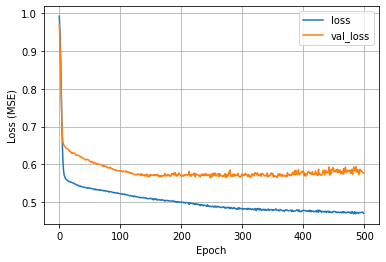

In [221]:
plot_loss(history) # epoch vs loss graph

# Deeper Model

In [237]:
deeper_model = Sequential()
deeper_model.add(Dense(64, input_dim=7, kernel_initializer='normal', activation='relu')) # layer pertama menggunakan 64 neuron activation relu
deeper_model.add(Dense(128, kernel_initializer='normal', activation='relu')) #layer kedua menggunakan 96 neuron
deeper_model.add(Dense(156, kernel_initializer='normal', activation='relu')) #layer ketiga menggunakan 96 neuron
deeper_model.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)
deeper_model.compile(loss='mean_squared_error', optimizer=opt) #disini untuk loss nya menggunakan metrics MSE dan optimizer SGD

history = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=500, batch_size=15)

Epoch 1/500
42/42 [==============================] - 0s 4ms/step - loss: 0.9975 - val_loss: 0.9925
Epoch 2/500
42/42 [==============================] - 0s 2ms/step - loss: 0.9883 - val_loss: 0.9853
Epoch 3/500
42/42 [==============================] - 0s 2ms/step - loss: 0.9809 - val_loss: 0.9764
Epoch 4/500
42/42 [==============================] - 0s 2ms/step - loss: 0.9697 - val_loss: 0.9644
Epoch 5/500
42/42 [==============================] - 0s 2ms/step - loss: 0.9523 - val_loss: 0.9465
Epoch 6/500
42/42 [==============================] - 0s 2ms/step - loss: 0.9283 - val_loss: 0.9195
Epoch 7/500
42/42 [==============================] - 0s 2ms/step - loss: 0.8913 - val_loss: 0.8789
Epoch 8/500
42/42 [==============================] - 0s 2ms/step - loss: 0.8364 - val_loss: 0.8211
Epoch 9/500
42/42 [==============================] - 0s 2ms/step - loss: 0.7568 - val_loss: 0.7481
Epoch 10/500
42/42 [==============================] - 0s 2ms/step - loss: 0.6675 - val_loss: 0.6832
Epoch 11/

In [223]:
#menampilkan hasil evaluasi nilai loss dari model
loss = deeper_model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

9/9 - 0s - loss: 0.5990
Test loss: 0.5989551544189453


In [224]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.5989551529100327
MAE (Mean Absolute Error) 0.5478430973076126
r^2 score 0.40104484708996724
RMSE (Root Mean Squared Error 0.7739219294670702


In [225]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
170,0.466518,0.543947,170
152,0.469226,0.548025,152
155,0.471573,0.548211,155
143,0.479191,0.548232,143
166,0.472251,0.548522,166
...,...,...,...
4,0.970801,0.966330,4
3,0.980222,0.976290,3
2,0.986620,0.983320,2
1,0.992279,0.989023,1


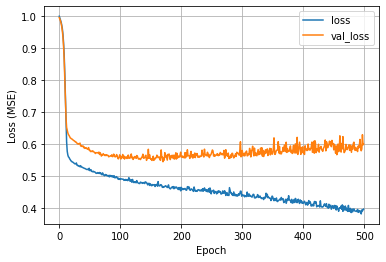

In [226]:
plot_loss(history) # epoch vs loss graph

# Wider Model

In [227]:
wider_model = Sequential()
wider_model.add(Dense(256, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)
wider_model.compile(loss='mean_squared_error', optimizer=opt)

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=500, batch_size=15)

Epoch 1/500
42/42 [==============================] - 0s 3ms/step - loss: 0.9078 - val_loss: 0.8130
Epoch 2/500
42/42 [==============================] - 0s 1ms/step - loss: 0.7250 - val_loss: 0.7067
Epoch 3/500
42/42 [==============================] - 0s 1ms/step - loss: 0.6326 - val_loss: 0.6627
Epoch 4/500
42/42 [==============================] - 0s 1ms/step - loss: 0.5903 - val_loss: 0.6473
Epoch 5/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5724 - val_loss: 0.6392
Epoch 6/500
42/42 [==============================] - 0s 1ms/step - loss: 0.5640 - val_loss: 0.6347
Epoch 7/500
42/42 [==============================] - 0s 1ms/step - loss: 0.5593 - val_loss: 0.6327
Epoch 8/500
42/42 [==============================] - 0s 1ms/step - loss: 0.5561 - val_loss: 0.6276
Epoch 9/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5546 - val_loss: 0.6247
Epoch 10/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5514 - val_loss: 0.6223
Epoch 11/

In [228]:
#menampilkan hasil evaluasi nilai loss dari model
loss = wider_model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

9/9 - 0s - loss: 0.5645
Test loss: 0.5645064115524292


In [229]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.5645064130770142
MAE (Mean Absolute Error) 0.5270947044464982
r^2 score 0.43549358692298556
RMSE (Root Mean Squared Error 0.7513364180425531


In [230]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
147,0.484131,0.553554,147
293,0.458993,0.553586,293
157,0.478946,0.554081,157
223,0.466764,0.554412,223
169,0.478543,0.554731,169
...,...,...,...
4,0.572389,0.639182,4
3,0.590253,0.647341,3
2,0.632644,0.662663,2
1,0.725004,0.706672,1


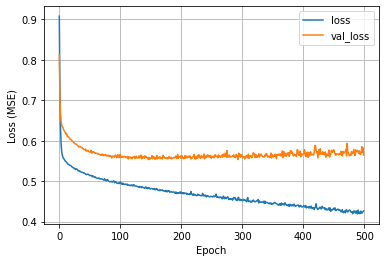

In [231]:
plot_loss(history) # epoch vs loss graph

# SuperWide Model

In [232]:
superwide_model = Sequential()
superwide_model.add(Dense(1028, input_dim=7, kernel_initializer='normal', activation='relu'))
superwide_model.add(Dense(1, kernel_initializer='normal'))

opt = SGD(learning_rate=0.001, momentum=0.9)
superwide_model.compile(loss='mean_squared_error', optimizer=opt)

history = superwide_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=500, batch_size=15)

Epoch 1/500
42/42 [==============================] - 0s 3ms/step - loss: 0.7824 - val_loss: 0.6444
Epoch 2/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.6325
Epoch 3/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5616 - val_loss: 0.6243
Epoch 4/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5555 - val_loss: 0.6222
Epoch 5/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5455 - val_loss: 0.6100
Epoch 6/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5429 - val_loss: 0.6038
Epoch 7/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5394 - val_loss: 0.6015
Epoch 8/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5372 - val_loss: 0.5945
Epoch 9/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5328 - val_loss: 0.5903
Epoch 10/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5302 - val_loss: 0.5875
Epoch 11/

In [233]:
#menampilkan hasil evaluasi nilai loss dari model
loss = superwide_model.evaluate(feature_test, label_test, verbose=2)

print("Test loss:", loss)

9/9 - 0s - loss: 0.6139
Test loss: 0.6139087080955505


In [234]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predictions = superwide_model.predict(feature_test)

predictions = predictions.flatten()

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.6139086958874469
MAE (Mean Absolute Error) 0.5308992030103947
r^2 score 0.386091304112553
RMSE (Root Mean Squared Error 0.7835232580386156


In [235]:
#membuat dataframe dari model
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
77,0.474791,0.547549,77
81,0.481777,0.548304,81
87,0.474419,0.549251,87
63,0.480391,0.550209,63
70,0.475971,0.550379,70
...,...,...,...
434,0.398432,0.630217,434
448,0.377596,0.632072,448
1,0.577503,0.632535,1
478,0.382465,0.638143,478


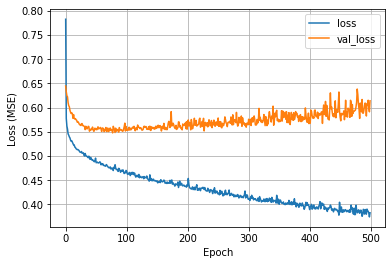

In [236]:
plot_loss(history) # epoch vs loss graph

# Beberapa Optimizer

In [240]:


wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

# opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer='adam')

wider_model_tuned.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 20)                160       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [241]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=500, batch_size=15)

Epoch 1/500
42/42 [==============================] - 0s 3ms/step - loss: 0.9597 - val_loss: 0.9238
Epoch 2/500
42/42 [==============================] - 0s 2ms/step - loss: 0.8588 - val_loss: 0.8025
Epoch 3/500
42/42 [==============================] - 0s 2ms/step - loss: 0.7257 - val_loss: 0.6972
Epoch 4/500
42/42 [==============================] - 0s 2ms/step - loss: 0.6300 - val_loss: 0.6522
Epoch 5/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5878 - val_loss: 0.6397
Epoch 6/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5702 - val_loss: 0.6374
Epoch 7/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5643 - val_loss: 0.6379
Epoch 8/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5608 - val_loss: 0.6375
Epoch 9/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5582 - val_loss: 0.6337
Epoch 10/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5568 - val_loss: 0.6302
Epoch 11/

In [242]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
322,0.487919,0.559657,322
295,0.488003,0.560628,295
299,0.487678,0.560660,299
287,0.489278,0.561176,287
256,0.490228,0.561564,256
...,...,...,...
4,0.587800,0.639732,4
3,0.630030,0.652172,3
2,0.725658,0.697209,2
1,0.858840,0.802516,1


In [243]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.5768387989508283
MAE (Mean Absolute Error) 0.5245502428825743
r^2 score 0.42316120104917154
RMSE (Root Mean Squared Error 0.7594990447333217


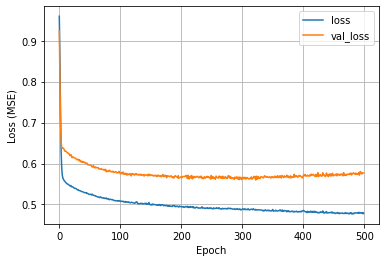

In [244]:
plot_loss(history_tuned) # epoch vs loss graph

In [245]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=7, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 20)                160       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 21        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [246]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=500, batch_size=15)

Epoch 1/500
42/42 [==============================] - 0s 3ms/step - loss: 0.9562 - val_loss: 0.9120
Epoch 2/500
42/42 [==============================] - 0s 1ms/step - loss: 0.8592 - val_loss: 0.8111
Epoch 3/500
42/42 [==============================] - 0s 1ms/step - loss: 0.7495 - val_loss: 0.7200
Epoch 4/500
42/42 [==============================] - 0s 2ms/step - loss: 0.6621 - val_loss: 0.6685
Epoch 5/500
42/42 [==============================] - 0s 1ms/step - loss: 0.6098 - val_loss: 0.6479
Epoch 6/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5822 - val_loss: 0.6424
Epoch 7/500
42/42 [==============================] - 0s 1ms/step - loss: 0.5703 - val_loss: 0.6419
Epoch 8/500
42/42 [==============================] - 0s 1ms/step - loss: 0.5655 - val_loss: 0.6410
Epoch 9/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5626 - val_loss: 0.6417
Epoch 10/500
42/42 [==============================] - 0s 2ms/step - loss: 0.5602 - val_loss: 0.6385
Epoch 11/

In [247]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
466,0.468686,0.550621,466
416,0.475923,0.550870,416
440,0.473042,0.550938,440
452,0.471959,0.551138,452
432,0.473467,0.551250,432
...,...,...,...
4,0.609835,0.647868,4
3,0.662101,0.668501,3
2,0.749478,0.719987,2
1,0.859239,0.811084,1


In [248]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.5600170710082266
MAE (Mean Absolute Error) 0.5214914280295869
r^2 score 0.43998292899177327
RMSE (Root Mean Squared Error 0.7483428833150126


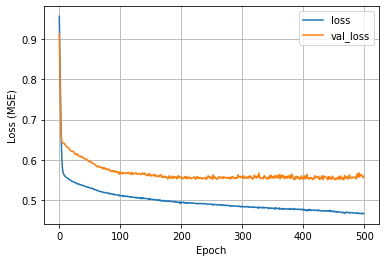

In [249]:
plot_loss(history_rmsprop) # epoch vs loss graph

# Kesimpulan

Hasil terbaik didapatkan pada Model Optimizer RMSProp dengan hasil terbaik pada Epoch 467 loss: 0.4687 - val_loss: 0.5506 dan nilai r2_score yang didapatkan 0.4399